In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas

In [3]:
conn = sqlite3.connect('/Users/tonimelisma/Dropbox/Weather/db.sqlite')

In [4]:
dates_sql = (f"select strftime('%Y-%m-%d', timestamp) as date from measurements "
f"group by strftime('%Y-%m-%d', timestamp) order by timestamp")

In [5]:
dates = pandas.read_sql(dates_sql, conn)
dates

,date
0,2022-10-13
1,2022-10-14


In [8]:
def plot_day(date):
    days_sql = (f"select strftime('%H', timestamp) as hour, temperature, pressure, humidity from measurements "
    f"where strftime('%Y-%m-%d', timestamp) = '{date}' "
    f"group by strftime('%H', timestamp) order by timestamp")
    days_data = pandas.read_sql(days_sql, conn)
    
    plt.bar(days_data.hour, days_data.temperature)
    plt.title(date)
    ax = plt.gca()
    ax.set_ylim([19,25])
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='r', labelsize='medium', width=3)
    plt.show()

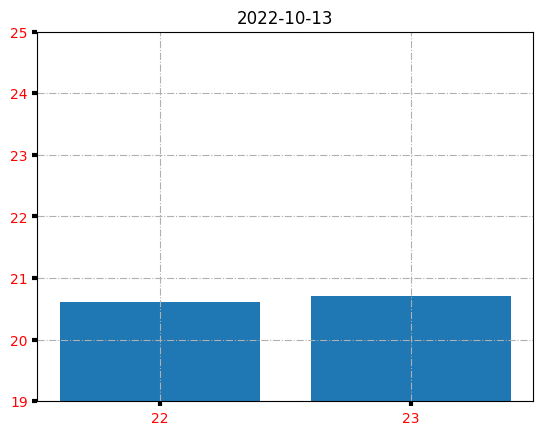

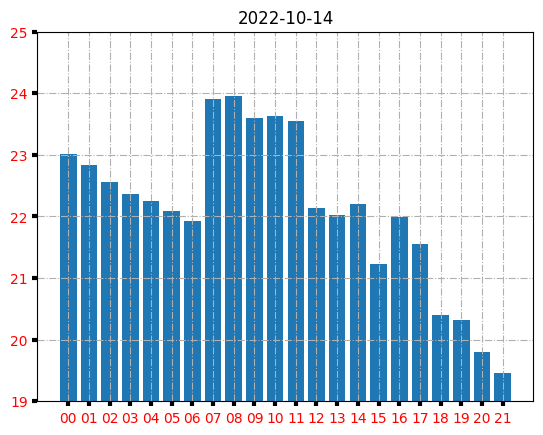

In [9]:
for i, date in dates.iterrows():
    plot_day(date['date'])